# **NAME : Affan Zulfiqar**
# **REG ID : B22F0144AI050**
# **LAB MID Exam**

# **Task 1:**

In [ ]:
import pandas as pd

# Here I loaded the housing dataset from a CSV file
data = pd.read_csv('/content/housing.csv')

# Displayig first few rows
print("First 5 Rows of the Dataset:\n", data.head())

# Displaying data types for each column
print("\nData Types:\n", data.dtypes)

# Check for missing values
print("\nMissing Values :\n", data.isnull().sum())

print("\nDataset Description:\n\n", data.describe())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  

Data Types:
 longitude             float64
latitude              float64
h

# **Task 2:**

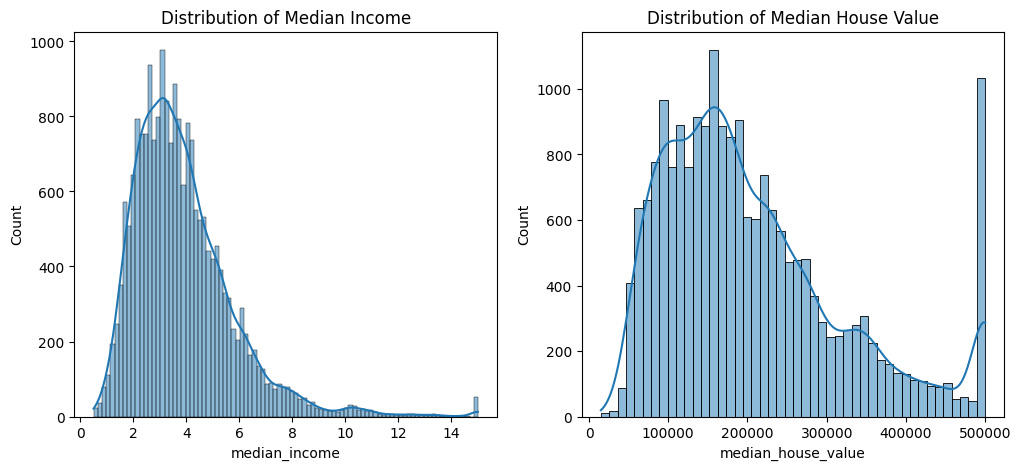

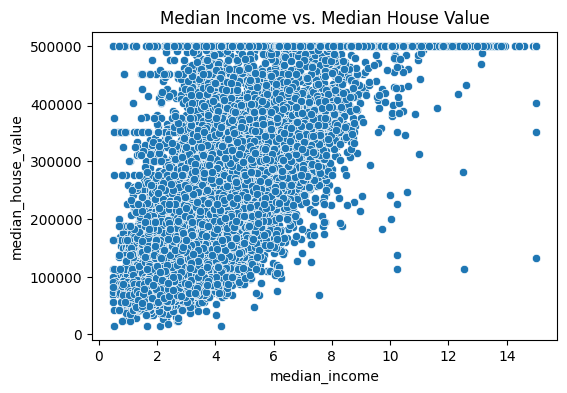

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for 'median_income' and 'median_house_value'
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data['median_income'], kde=True)
plt.title('Distribution of Median Income')
plt.xlabel('Median Income')

plt.subplot(1, 2, 2)
sns.histplot(data['median_house_value'], kde=True)
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')

plt.show()

# Scatter plot to explore the relationship between 'median_income' and 'median_house_value'
plt.figure(figsize=(6, 4))
sns.scatterplot(x='median_income', y='median_house_value', data=data)
plt.title('Median Income vs. Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')

plt.show()


**Outliers or Anomalies:**

In these visualizations, there are outliers. For example:
* A few households have very high median incomes compared to the rest of the dataset.
* The cap at $500,000 in the scatter plot suggests that some house prices may not reflect true market values, introducing bias in the analysis.

# **Task 3:**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

data['total_bedrooms'] = data['total_bedrooms'].fillna(data['total_bedrooms'].mean())

# Prepare features and target variable
X = data.drop(['median_house_value', 'ocean_proximity'], axis=1)
y = data['median_house_value']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')


Mean Squared Error: 5052953703.90
R-squared: 0.61


# **Task 4:**

  class                                            message Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
class      0
message    0
dtype: int64
Confusion Matrix:
 [[964   1]
 [ 24 126]]
Accuracy: 0.98
Precision: 0.99
Recall: 0.84
F1 Score: 0.91


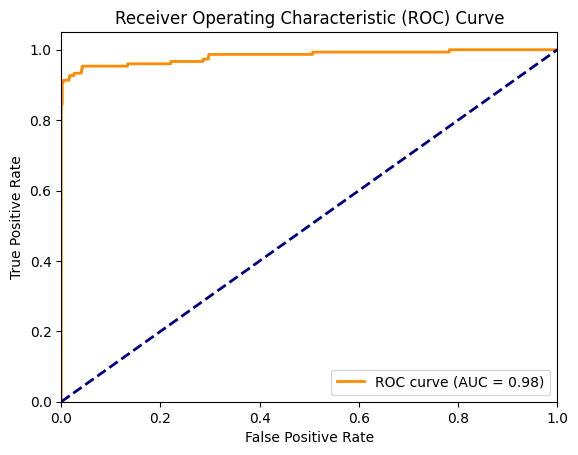

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("/content/spam.csv", encoding="latin-1")

# Display the first few rows
print(data.head())

# Drop unnecessary columns ('Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4')
data = data[['class', 'message']]

# Encode the target variable: 'spam' -> 1, 'ham' -> 0
data['class'] = data['class'].map({'spam': 1, 'ham': 0})

# Check for missing values
print(data.isnull().sum())

# Separate features and target
X = data['message']
y = data['class']

# Convert text data to numerical using CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# **Task 5:**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv("/content/housing.csv")

# Handle missing values (replace with mean)
data = data.copy()  # To avoid the warning in some cases
data['total_bedrooms'] = data['total_bedrooms'].fillna(data['total_bedrooms'].mean())


# One-hot encode categorical features (like 'ocean_proximity')
data = pd.get_dummies(data, drop_first=True)

# Separate features and target
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply StandardScaler for feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predict using Linear Regression
y_pred_linear = linear_reg.predict(X_test)

# Evaluate Linear Regression model
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Linear Regression Performance:")
print(f"Mean Squared Error: {mse_linear:.2f}")
print(f"R-squared: {r2_linear:.2f}")

# Train the Ridge Regression model with alpha=1.0
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train_scaled, y_train)

# Predict using Ridge Regression
y_pred_ridge = ridge_reg.predict(X_test_scaled)

# Evaluate Ridge Regression model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("\nRidge Regression Performance:")
print(f"Mean Squared Error: {mse_ridge:.2f}")
print(f"R-squared: {r2_ridge:.2f}")

# Compare performance
print("\nPerformance Comparison:")
print(f"MSE Reduction: {mse_linear - mse_ridge:.2f}")
print(f"R-squared Improvement: {r2_ridge - r2_linear:.2f}")


Linear Regression Performance:
Mean Squared Error: 4904399775.95
R-squared: 0.63

Ridge Regression Performance:
Mean Squared Error: 4903987826.87
R-squared: 0.63

Performance Comparison:
MSE Reduction: 411949.08
R-squared Improvement: 0.00


**Overfitting or Underfitting:**

Since both models show similar performance, so it implies that the models are neither overfitting nor underfitting.